##  Bank_Personal_Loan_Prediction

### Objective: 
We build the model that will help to identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# To calculate accuracy measures and confusion matrix
from sklearn import metrics

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



## Data Ingestion

In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.rename(columns={'Personal Loan': 'Personal_Loan'}, inplace = True)

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# check the missing value
print('Number of the missing value across the columns\n',df.isnull().sum())

Number of the missing value across the columns
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [8]:
# Describe the dataset
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Observations-

-: ID, Zip Code fields needs to be removed from thee dataset as these not irrelevant for this excercise
    
-: Experience fields has some negative values which needs to be imputed
    
-: No missing value observed in the dataset
    
-: Based on Max value of Income, Mortgage and CCAvg - Suspect Outliers which will be investigated during the excercise

## Study the data distribution in each attribute

### As part of studying each attribute, we will look at the data individually as well as against the target variable distribution

1) BoxPlots for each attribute and against target column

2) T-Test to validate hypothesis

3) Handling outliers basis data distribution (if any)

4) Understanding Categorical data i.e., Family size, Education categories, Securities (y/n), Online (y/n), CD (y/n) to determine historical relative frequency (Probabilty) across these variables to provide a 'Loan Response Rate'

In [9]:
# Studying Data Distribution of every attribute using a BoxPlot to review distribution and Outliers in the dataset

<AxesSubplot:xlabel='Age'>

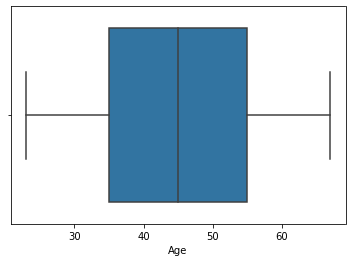

In [10]:
sns.boxplot(x='Age', data=df)

<AxesSubplot:xlabel='Personal_Loan', ylabel='Age'>

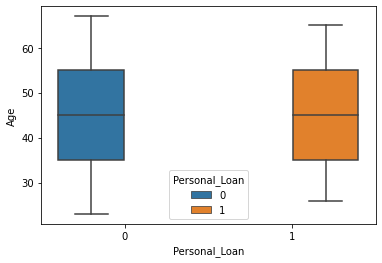

In [11]:
sns.boxplot(x='Personal_Loan', y='Age', hue='Personal_Loan', data=df)

####  Observation:
    
There are no outliers in 'Age' variable and customers of age ranging from 25 to 60 years had accepted the personal loan offered in the last campaign.

<AxesSubplot:xlabel='Experience'>

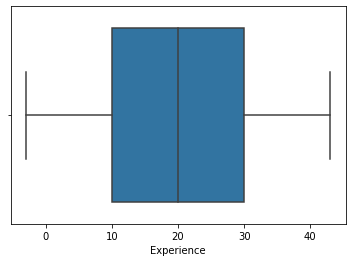

In [12]:
sns.boxplot(x ='Experience', data = df)

<AxesSubplot:xlabel='Personal_Loan', ylabel='Experience'>

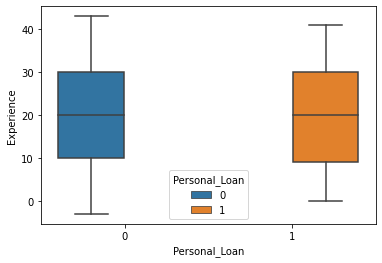

In [13]:
sns.boxplot(x='Personal_Loan', y='Experience', hue='Personal_Loan', data=df)

#### Observation:
    
No Outliers observed, however negative age value will be see in the describe the data.

<class 'numpy.ndarray'>


<AxesSubplot:xlabel='Experience'>

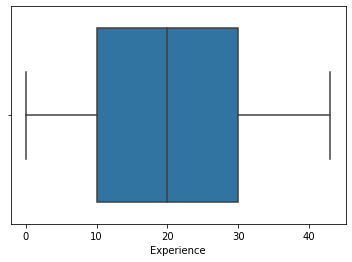

In [14]:
# Removing negative values in 'Experience' variable
neg_array = np.array(df['Experience'])
print(type(neg_array))

neg_array[neg_array < 0] = 0
df['Experience'] = pd.DataFrame(neg_array)

sns.boxplot(x='Experience', data=df)

<AxesSubplot:xlabel='Income'>

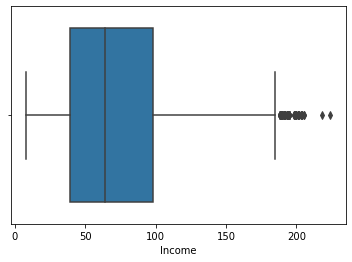

In [15]:
sns.boxplot(x = 'Income', data = df)

#### Observation:

There are few outliers in 'Income' variable so it needs to be treated

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

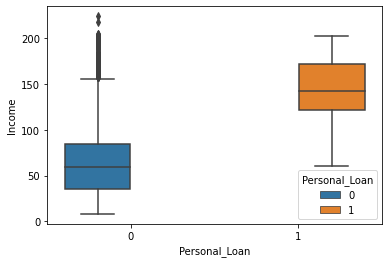

In [16]:
sns.boxplot(x = 'Personal_Loan', y = 'Income', hue = "Personal_Loan",data = df)

#### Observation:

Customers with income ranging from USD 60k to 200k had accepted the personal loan offered in the last campaign. But 50% of customers who accepted personal loan had income range of USD 120k to 170k.

186.5
<class 'numpy.ndarray'>


<AxesSubplot:xlabel='Income'>

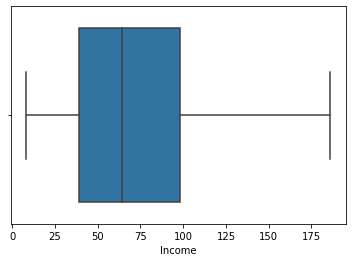

In [17]:
# Remove the Outliers
q75, q25 = np.percentile(df['Income'], [75 ,25])
iqr = q75 - q25
max_val = q75 + 1.5*iqr
print(max_val)

inc_array = np.array(df['Income'])
print(type(inc_array))

inc_array[inc_array > max_val] = max_val
df['Income'] = pd.DataFrame(inc_array)

sns.boxplot(x='Income', data=df)

<AxesSubplot:xlabel='CCAvg'>

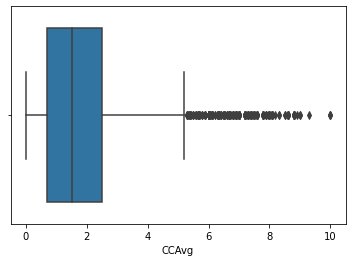

In [18]:
sns.boxplot(x = 'CCAvg' , data = df)

#### Observation:
    
There are few outliers in 'CCAvg' variable so it needs to be treated

<AxesSubplot:xlabel='Personal_Loan', ylabel='CCAvg'>

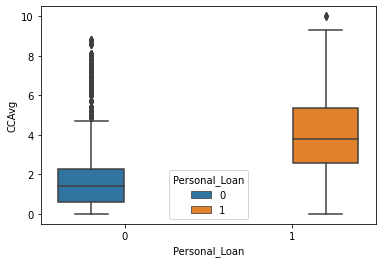

In [19]:
sns.boxplot(x = "Personal_Loan",y = "CCAvg", hue = "Personal_Loan", data = df)

#### Observation:

Customers with average monthly credit card spend of USD 0 to 10k had accepted the personal loan offered in the last campaign.But 50% of customers who accepted personal loan had average monthly credit card spend of USD 2.5K to 5.5K.

5.2
<class 'numpy.ndarray'>


<AxesSubplot:xlabel='CCAvg'>

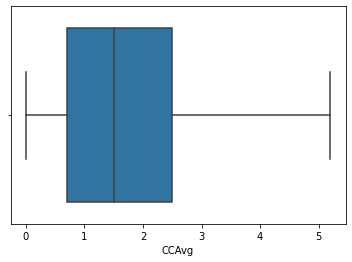

In [20]:
# Outliers treatment in 'CCAvg' variable - Using Statistical Outlier identification Method
q75, q25 = np.percentile(df['CCAvg'], [75 ,25])
iqr = q75 - q25
max_val = q75 + 1.5*iqr
print(max_val)

inc_array = np.array(df['CCAvg'])
print(type(inc_array))

inc_array[inc_array > max_val] = max_val
df['CCAvg'] = pd.DataFrame(inc_array)

sns.boxplot(x='CCAvg', data=df)

<AxesSubplot:xlabel='Mortgage'>

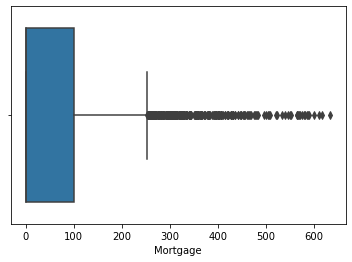

In [21]:
sns.boxplot(x='Mortgage', data=df)

#### Observation:

There are few outliers in 'Mortgage' variable so it needs to be treated.

<AxesSubplot:xlabel='Personal_Loan', ylabel='Mortgage'>

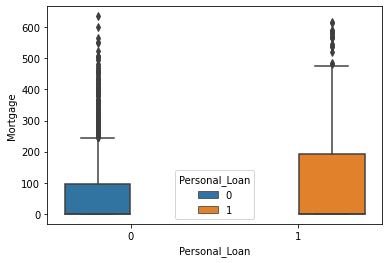

In [22]:
sns.boxplot(x= 'Personal_Loan',y = 'Mortgage', hue = 'Personal_Loan',data = df)

#### Observation:
    
Customers with mortgage ranging from USD 0 to 650k had accepted the personal loan offered in the last campaign. Customers who accepted personal loan had mortgage mostly ranging from USD 0 to 200k.

252.5
<class 'numpy.ndarray'>


<AxesSubplot:xlabel='Mortgage'>

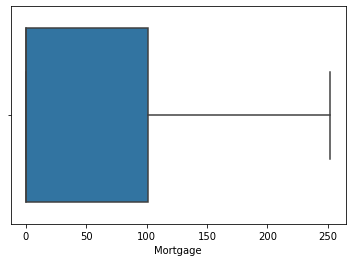

In [23]:
# Outliers treatment in 'Mortgage' variable
q75, q25 = np.percentile(df['Mortgage'], [75 ,25])
iqr = q75 - q25
max_val = q75 + 1.5*iqr
print(max_val)

mort_array = np.array(df['Mortgage'])
print(type(mort_array))

mort_array[mort_array > max_val] = max_val
df['Mortgage'] = pd.DataFrame(mort_array)

sns.boxplot(x='Mortgage', data=df)

<AxesSubplot:xlabel='Personal_Loan', ylabel='Mortgage'>

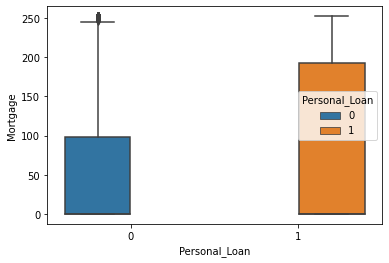

In [24]:
sns.boxplot(x= 'Personal_Loan',y = 'Mortgage', hue = 'Personal_Loan',data = df)

In [25]:
# Understanding categorical variables
personal_loan = np.array(df['Personal_Loan'])
family = np.array(df['Family'])
education = np.array(df['Education'])
sec_acc = np.array(df['Securities Account'])
cd_acc = np.array(df['CD Account'])
online = np.array(df['Online'])
credit_card = np.array(df['CreditCard'])

In [26]:
pd.crosstab(personal_loan, family, rownames=['Personal_Loan'], colnames=['Family size']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Family size,1,2,3,4
Personal_Loan,,,,
0,92.73,91.82,86.83,89.03
1,7.27,8.18,13.17,10.97


#### Observation:

1) 7.27% of customers with Family size = 1 had accepted the personal loan offered in the previous campaign.

2) 8.18% of customers with Family size = 2 had accepted the personal loan offered in the previous campaign.

3) 13.17% of customers with Family size = 3 had accepted the personal loan offered in the previous campaign.

4) 10.97% of customers with Family size = 4 had accepted the personal loan offered in the previous campaign.

In [27]:
pd.crosstab(personal_loan, education, rownames=['Personal_Loan'], colnames=['Education level']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Education level,1,2,3
Personal_Loan,,,
0,95.56,87.03,86.34
1,4.44,12.97,13.66


#### Observation:

1) 4.44% of customers with Education level = 1 (Undergrad) had accepted the personal loan offered in the previous campaign.

2) 12.97% of customers with Education level = 2 (Graduate) had accepted the personal loan offered in the previous campaign.

2) 13.66% of customers with Education level = 3 (Advanced/Professional) had accepted the personal loan offered in the previous campaign.

In [28]:
pd.crosstab(personal_loan, sec_acc, rownames=['Personal_Loan'], colnames=['Securities Account']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)
            

Securities Account,0,1
Personal_Loan,,
0,90.62,88.51
1,9.38,11.49


#### Observation:

1) 9.38% of customers NOT HAVING securities account with the bank had accepted the personal loan offered in the previous campaign.

2) 11.49% of customers HAVING securities account with the bank had accepted the personal loan offered in the previous campaign.

In [29]:
pd.crosstab(personal_loan, cd_acc, rownames=['Personal_Loan'], colnames=['CD Account']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


CD Account,0,1
Personal_Loan,,
0,92.76,53.64
1,7.24,46.36


#### Observation:

1) 7.24% of customers NOT HAVING a certificate of deposit (CD) account with the bank had accepted the personal loan offered in the previous campaign.

2) 46.36% of customers HAVING a certificate of deposit (CD) account with the bank had accepted the personal loan offered in the previous campaign.

In [30]:
pd.crosstab(personal_loan, online, rownames=['Personal_Loan'], colnames=['Online']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Online,0,1
Personal_Loan,,
0,90.62,90.25
1,9.38,9.75


#### Observation:

1) 9.38% of customers NOT doing online transactions had accepted the personal loan offered in the previous campaign.

2) 9.75% of customers doing online transactions had accepted the personal loan offered in the previous campaign.

In [31]:
pd.crosstab(personal_loan, credit_card, rownames=['Personal_Loan'], colnames=['Credit Card']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)


Credit Card,0,1
Personal_Loan,,
0,90.45,90.27
1,9.55,9.73


#### Observation:

1) 9.55% of customers NOT using a credit card issued by UniversalBank had accepted the personal loan offered in the previous campaign.

2) 9.73% of customers using a credit card issued by UniversalBank had accepted the personal loan offered in the previous campaign.

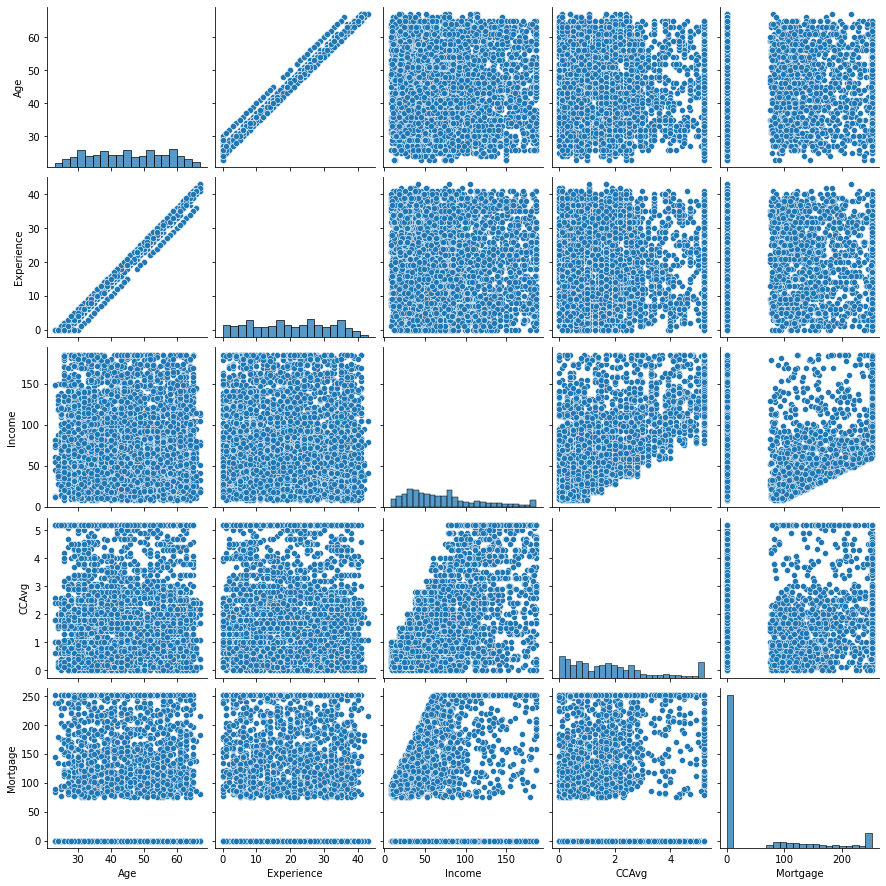

In [32]:
# Pair-plots of continuous variables
sns.pairplot(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])

<AxesSubplot:xlabel='Personal_Loan', ylabel='count'>

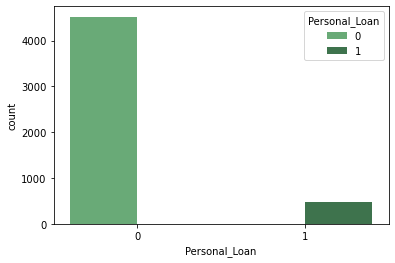

In [33]:
sns.countplot(x='Personal_Loan', data=df, palette="Greens_d", hue='Personal_Loan')

In [34]:
pd.value_counts(df['Personal_Loan'].values, sort=False)

0    4520
1     480
dtype: int64

#### Only (480/5000) = 9.6% of customers accepted the personal loan offered in the last campaign.

In [35]:
# Standardise data 
df.apply(lambda x: (x-np.mean(x))/(np.std(x)))
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [36]:
Y_labels = ['0', '1']

Text(0.5, 1.0, 'Correlation between different features of dataset\n')

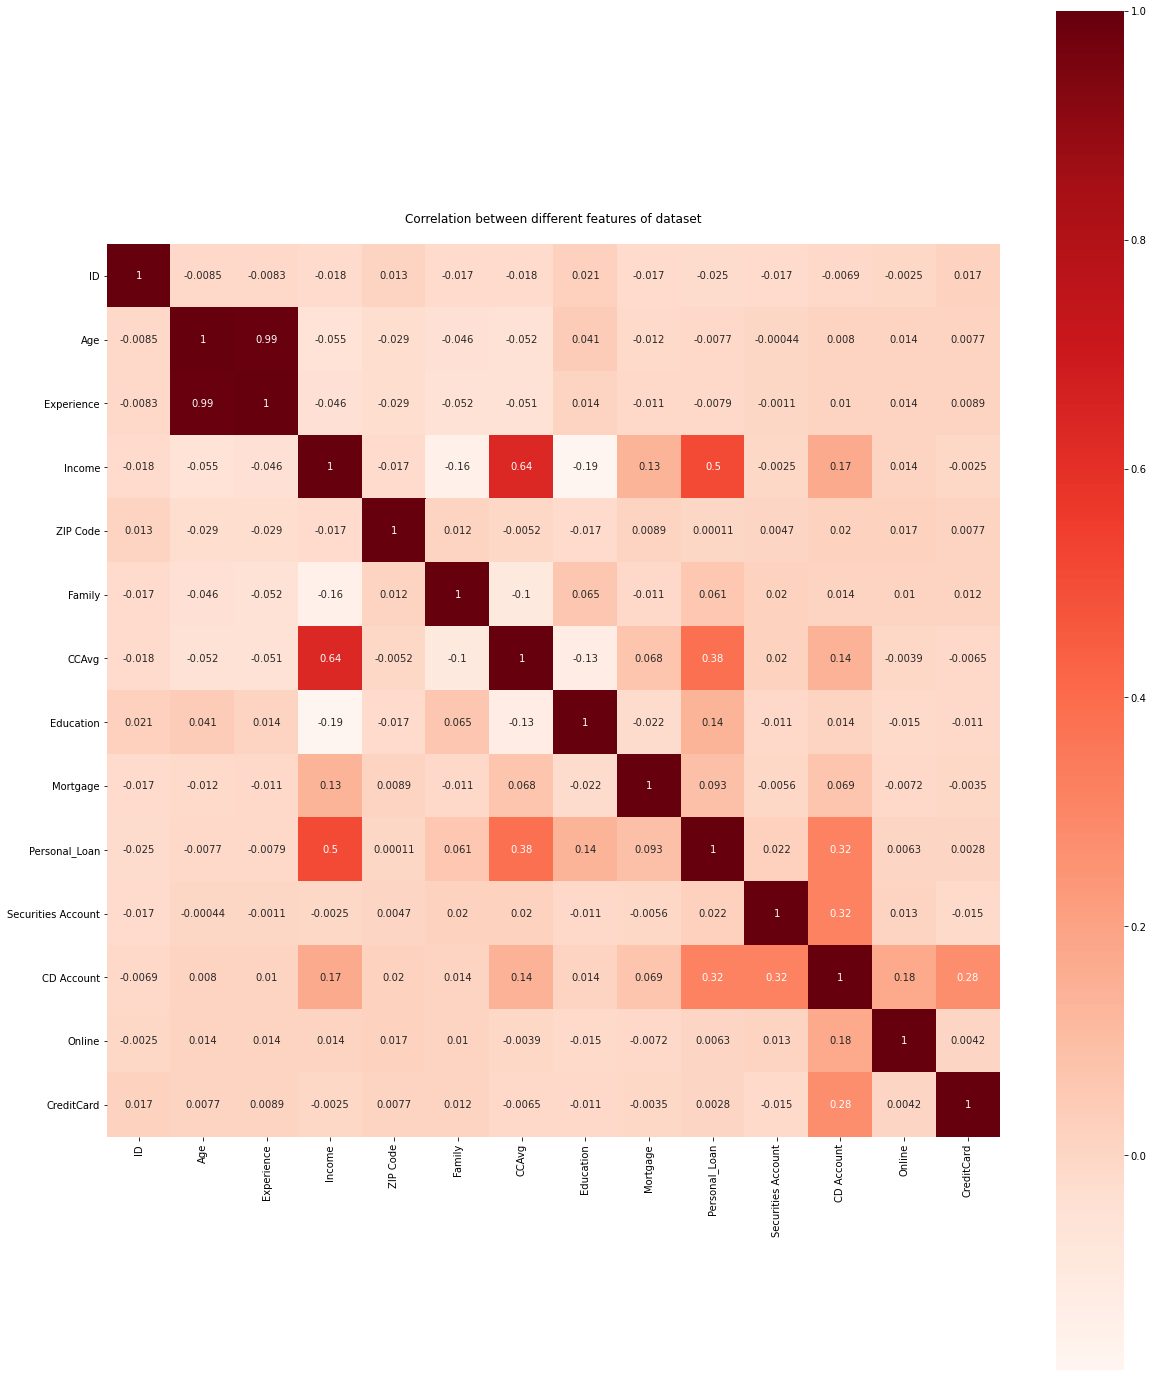

In [37]:
plt.figure(figsize=[20,25])
sns.heatmap(df.corr(),annot=True,square = True,cmap = 'Reds')
plt.title('Correlation between different features of dataset\n')

### Observation:

1) Age and Experience have very strong positive correlation of 0.99 

2) Income and CCAvg have strong positive correlation of 0.64

3) Income and Personal Loan have positive correlation of 0.50

4) CCAvg and Personal Loan have positive correlation of 0.38

###  Splitting data into Train and Test set

In [38]:
from sklearn.model_selection import train_test_split
y = df['Personal_Loan']
x = df.drop(['ID', 'ZIP Code', 'Personal_Loan'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)


In [39]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal_Loan, Length: 5000, dtype: int64

In [40]:
x

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


### Build Multiple Model

In [41]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)


C:\Users\metal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_train_pred = log_model.predict(x_train)
y_test_pred = log_model.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print('Train Accuracy',accuracy_score(y_train, y_train_pred))

Train Accuracy 0.9528571428571428


In [44]:
print('Test Accuracy is ',accuracy_score(y_test, y_test_pred))

Test Accuracy is  0.9473333333333334


In [45]:
print('Classification Report')
print(classification_report(y_test,y_test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.80      0.63      0.70       149

    accuracy                           0.95      1500
   macro avg       0.88      0.81      0.84      1500
weighted avg       0.94      0.95      0.94      1500



Confusion_matrix


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

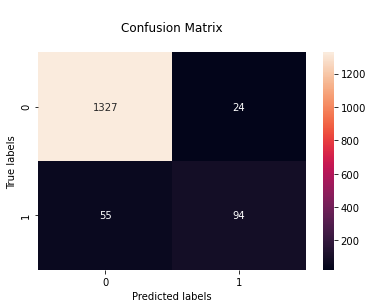

In [46]:
print('Confusion_matrix')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [47]:
# Decision Tree 
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
y_train_pred = dec_tree.predict(x_train)
y_test_pred = dec_tree.predict(x_test)

In [49]:
accuracy_score(y_train,y_train_pred)

1.0

In [50]:
print('accuracy score is',accuracy_score(y_test,y_test_pred))

accuracy score is 0.9713333333333334


In [51]:
print('Classification Report')
print(classification_report(y_test,y_test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1351
           1       0.85      0.87      0.86       149

    accuracy                           0.97      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.97      0.97      0.97      1500



Confusion_matrix


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

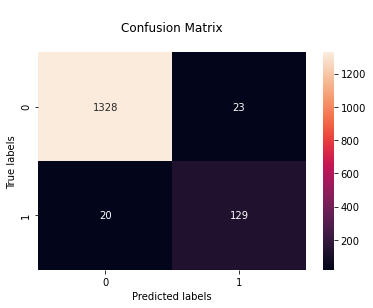

In [52]:
print('Confusion_matrix')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [53]:
dec_tree = DecisionTreeClassifier(criterion = 'entropy')
max_depth_est = np.arange(5, 500, 5)
scores = []

for n in max_depth_est:
    dec_tree.set_params(max_depth=n)
    dec_tree.fit(x_train, y_train)
    scores.append(dec_tree.score(x_test, y_test))   
    
i=0
for score in scores:
    if score==max(scores):
        print('\nScore of the Decision Tree model will be highest when max_depth = ', max_depth_est.tolist()[i])
        i=i+1


Score of the Decision Tree model will be highest when max_depth =  5


In [54]:
clf_tree = DecisionTreeClassifier(criterion= 'entropy',max_depth = 5)
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [55]:
y_train_pred = clf_tree.predict(x_train)
y_test_pred = clf_tree.predict(x_test)

In [56]:
accuracy_score(y_train,y_train_pred)

0.988

In [57]:
accuracy_score(y_test,y_test_pred)

0.9866666666666667

In [58]:
print('Classification Report')
print(classification_report(y_test,y_test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.93      0.93      0.93       149

    accuracy                           0.99      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.99      0.99      0.99      1500



Confusion Matrix


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

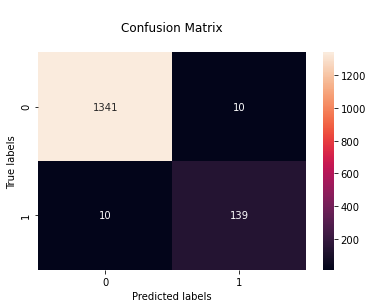

In [59]:
print('Confusion Matrix')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [60]:
# Support Vector Machine for Classification

from sklearn import metrics
from sklearn.svm import SVC

In [61]:
svm_clf = SVC().fit(x_train,y_train)

In [62]:
y_train_pred = svm_clf.predict(x_train)
y_test_pred = svm_clf.predict(x_test)

In [63]:
accuracy_score(y_train,y_train_pred)

0.9128571428571428

In [64]:
accuracy_score(y_test,y_test_pred)

0.904

In [65]:
print('Classification Report')
print(classification_report(y_test,y_test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1351
           1       0.56      0.16      0.25       149

    accuracy                           0.90      1500
   macro avg       0.74      0.57      0.60      1500
weighted avg       0.88      0.90      0.88      1500



Confusion Matrix


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

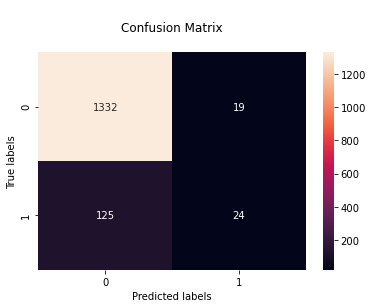

In [66]:
print('Confusion Matrix')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [67]:
# Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train)

GaussianNB()

In [68]:
y_train_pred = gnb_clf.predict(x_train)
y_test_pred = gnb_clf.predict(x_test)

In [69]:
accuracy_score(y_train,y_train_pred)

0.8962857142857142

In [70]:
accuracy_score(y_test,y_test_pred)

0.8893333333333333

In [71]:
print('Classification Report')
print(classification_report(y_test,y_test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1351
           1       0.46      0.59      0.51       149

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.73      1500
weighted avg       0.90      0.89      0.90      1500



Confusion Matrix


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

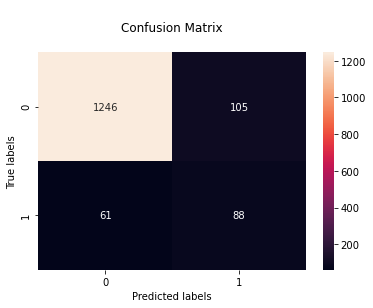

In [72]:
print('Confusion Matrix')
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

<AxesSubplot:xlabel='importance', ylabel='feature'>

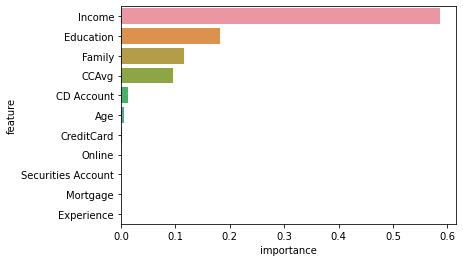

In [73]:
indices = np.argsort(clf_tree.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(x_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                         x_train.columns[indices[f]],
                         clf_tree.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

#### Note:
We apply Logistic Regression, Decision Tree , support vector machine and Gaussian Naive Bayes Classifier. but we got 98.2% accuracy by decision tree.

As per the model like decision tree , the most important features which influence the customer in taking personal loan are listed below:

1) Income

2) CCAvg (Avg. spending on credit cards per month (thousand dollars))

3) Education level

4) Family

5) CD Account (having certificate of deposit (CD) account or not)

6) Age

7) Mortgage

8) Experience